In [ ]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import AutoTokenizer
import numpy as np
import os

In [ ]:
dataset = load_dataset("ailsntua/QEvasion")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 3448
    })
    test: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 308
    })
})


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
text_columns = ['interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question']

In [ ]:
os.makedirs("token_length_histograms", exist_ok=True)


--- Token length analysis for column: interview_question ---
Number of samples: 3448
Max token length: 1036
Min token length: 7
Mean token length: 78.69
Median token length: 65.0
25th percentile: 30.0
75th percentile: 103.0
Histogram saved as: token_length_histograms/interview_question_token_length_histogram.pdf


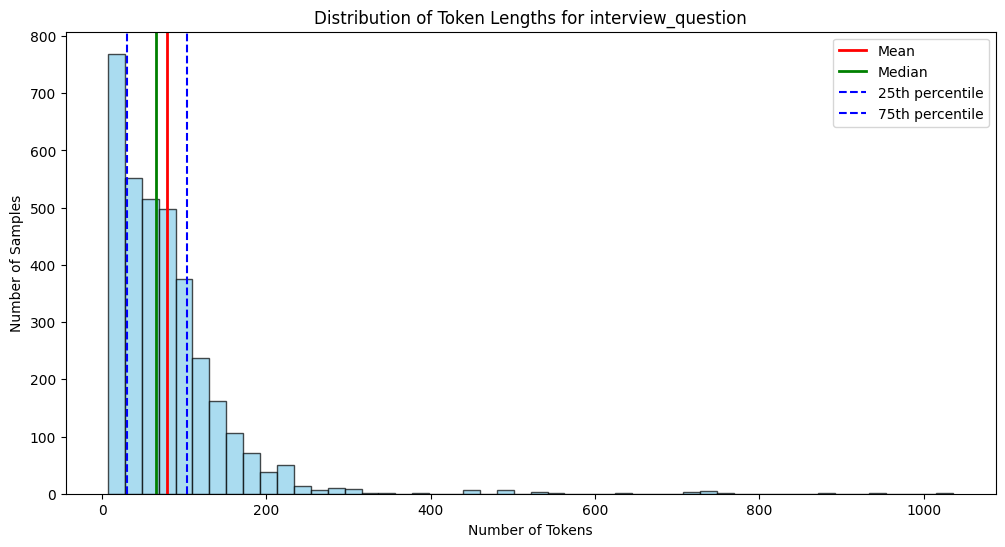


--- Token length analysis for column: interview_answer ---
Number of samples: 3448
Max token length: 2467
Min token length: 4
Mean token length: 364.00
Median token length: 259.5
25th percentile: 76.0
75th percentile: 537.0
Histogram saved as: token_length_histograms/interview_answer_token_length_histogram.pdf


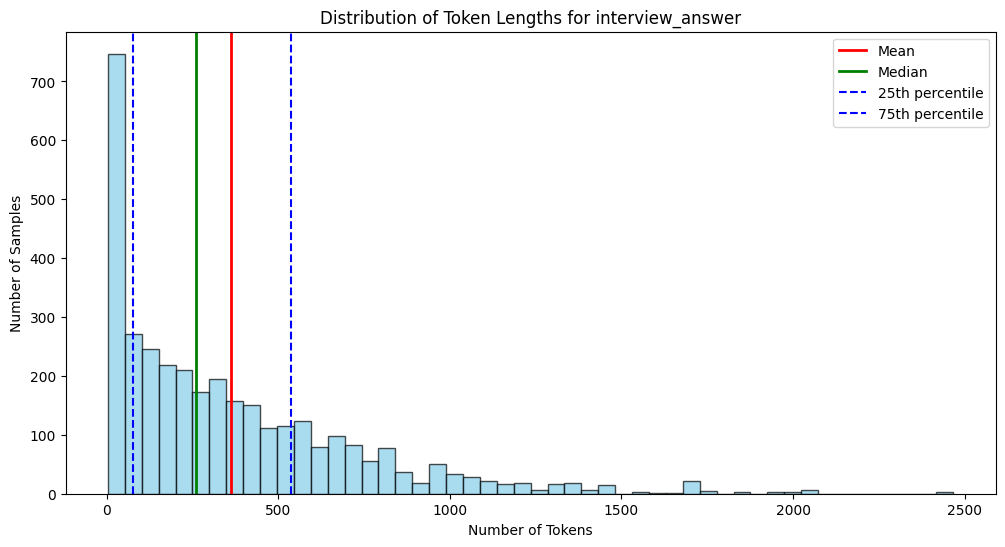


--- Token length analysis for column: gpt3.5_summary ---
Number of samples: 3448
Max token length: 649
Min token length: 27
Mean token length: 214.31
Median token length: 201.0
25th percentile: 124.0
75th percentile: 291.0
Histogram saved as: token_length_histograms/gpt3.5_summary_token_length_histogram.pdf


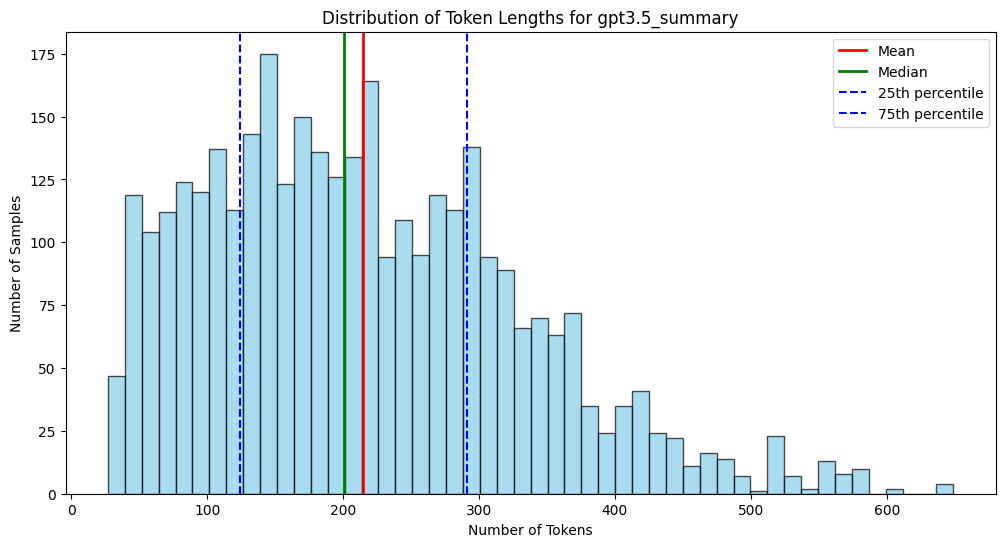


--- Token length analysis for column: gpt3.5_prediction ---
Number of samples: 3448
Max token length: 640
Min token length: 38
Mean token length: 183.72
Median token length: 173.0
25th percentile: 116.75
75th percentile: 227.0
Histogram saved as: token_length_histograms/gpt3.5_prediction_token_length_histogram.pdf


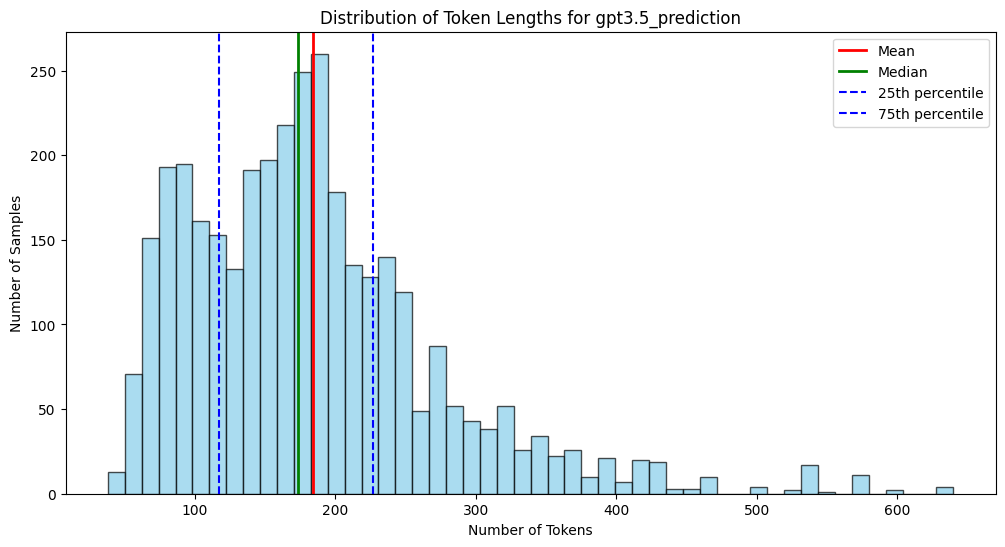


--- Token length analysis for column: question ---
Number of samples: 3448
Max token length: 97
Min token length: 3
Mean token length: 18.93
Median token length: 17.0
25th percentile: 12.0
75th percentile: 24.0
Histogram saved as: token_length_histograms/question_token_length_histogram.pdf


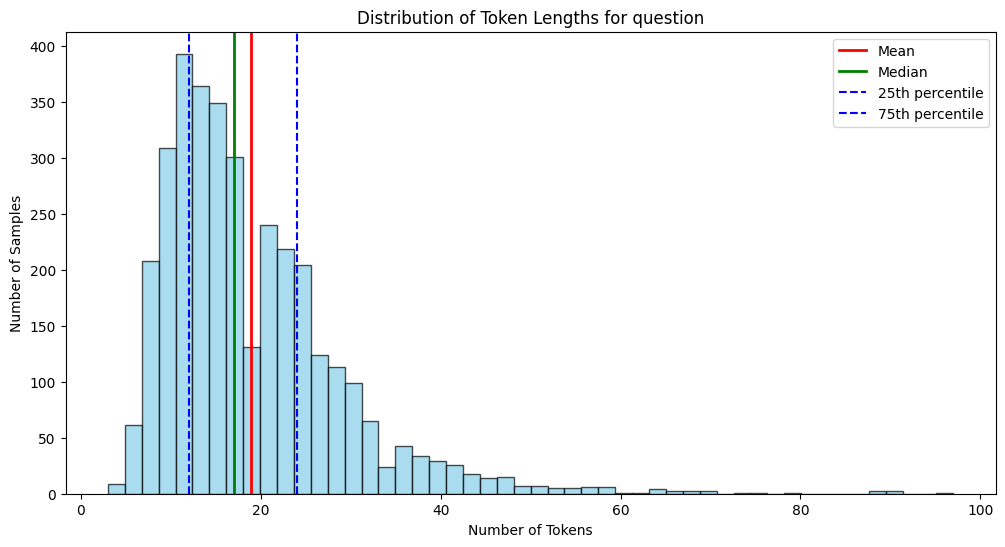

In [ ]:
for col in text_columns:
    print(f"\n--- Token length analysis for column: {col} ---")

    # Compute token lengths
    token_lengths = [len(tokenizer.encode(sample[col], truncation=False))
                     for sample in dataset['train']]

    # Statistics
    mean_val = np.mean(token_lengths)
    median_val = np.median(token_lengths)
    percentile_25 = np.percentile(token_lengths, 25)
    percentile_75 = np.percentile(token_lengths, 75)

    print(f"Number of samples: {len(token_lengths)}")
    print(f"Max token length: {np.max(token_lengths)}")
    print(f"Min token length: {np.min(token_lengths)}")
    print(f"Mean token length: {mean_val:.2f}")
    print(f"Median token length: {median_val}")
    print(f"25th percentile: {percentile_25}")
    print(f"75th percentile: {percentile_75}")

    # Plot histogram
    plt.figure(figsize=(12,6))
    plt.hist(token_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Token Lengths for {col}")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Number of Samples")

    # Plot statistics as vertical lines
    plt.axvline(mean_val, color='red', linestyle='-', linewidth=2, label='Mean')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label='Median')
    plt.axvline(percentile_25, color='blue', linestyle='--', linewidth=1.5, label='25th percentile')
    plt.axvline(percentile_75, color='blue', linestyle='--', linewidth=1.5, label='75th percentile')

    plt.legend()

    # Save histogram as PDF
    pdf_path = f"token_length_histograms/{col}_token_length_histogram.pdf"
    plt.savefig(pdf_path, format='pdf')
    print(f"Histogram saved as: {pdf_path}")

    plt.show()